In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [84]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [85]:
file_name = 'laptop_price.csv'
df = pd.read_csv(file_name, encoding ='ISO-8859-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### 데이터의 dtype을 확인

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


#### 데이터의 shape확인

In [87]:
df.shape

(1303, 13)

#### 데이터의 null값 확인

In [88]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [89]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


#### columns를 사용하기 편하게 하기위해서 소문자로 표현

In [90]:
df = df.rename(columns = str.lower)
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Data Cleaning

- laptop_id와 index가 맞지 않기 때문에 laptop_id가 도중에 잘못 기입됐을꺼라고 예측
- 처음으로 laptop_id와 틀린 곳을 찾고 다시 고쳐 쓰기

In [91]:
df['laptop_id']

0          1
1          2
2          3
3          4
4          5
        ... 
1298    1316
1299    1317
1300    1318
1301    1319
1302    1320
Name: laptop_id, Length: 1303, dtype: int64

In [92]:
index = 0
for i in df['laptop_id']:
    if index+1 != i:
        print(i)
        break
    index += 1

66


In [93]:
filter1 = df['laptop_id'] == 66
df[filter1]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
64,66,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.86kg,690.0


### 잘못쓰여진 곳을 찾긴 했지만 다시 쓰는 것보단 중요한 데이터가 아니라고 판단 (drop)

In [94]:
df = df.drop(['laptop_id'], axis = 1)

### screenresolution을 살리기 위해 데이터 정제
- touch panel인지 정제
- screen size만 때어내서 정제
- panel의 종류 정제

In [95]:
def check_screensize(df):
    return df.split()[-1]

def check_touchscreen(df):
    if 'Touch' in df:
        return 'YES'
    else:
        return 'NO'
    
def check_solution(df):
    if '/' in df:
        return df.split('/')[0]
    else:
        return " ".join(df.split(' ')[:-1])

In [96]:
df['screensize'] = df['screenresolution'].apply(check_screensize)
df['touchscreen'] = df['screenresolution'].apply(check_touchscreen)
df['screentype'] = df['screenresolution'].apply(check_solution)

In [97]:
#df['solution'] = df['solution'].replace(' ', 'unknown')

### 원래의 screenresolution 제거

In [98]:
df = df.drop(['screenresolution'], axis = 1)

### 정제한 값이 맞는지 확인하기

In [99]:
df['screentype'].value_counts()

screentype
Full HD                     507
                            314
IPS Panel Full HD           235
IPS Panel Full HD            53
Full HD                      47
Touchscreen                  32
IPS Panel Retina Display     17
Quad HD+                     15
IPS Panel Touchscreen        13
IPS Panel 4K Ultra HD        12
IPS Panel                    11
IPS Panel 4K Ultra HD        11
4K Ultra HD                  10
4K Ultra HD                   7
IPS Panel Quad HD+            6
IPS Panel Quad HD+            5
Touchscreen                   3
Quad HD+                      3
IPS Panel Touchscreen         2
Name: count, dtype: int64

In [100]:
df['touchscreen'].value_counts()

touchscreen
NO     1111
YES     192
Name: count, dtype: int64

In [101]:
df['screensize'].value_counts()

screensize
1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: count, dtype: int64

#### screentype부분 정제가 조금 더 필요하다.
- IPS Panel의 종류대로 정제
- 개수가 적은 값이나 오류값은 np.nan으로 정제
> 거의 다 IPS Panel이긴 하다.
>
> ***drop할 수도 있지만 그래도 노트북 가격 예측에 필요할 수도 있기 때문에 정제 필요***

In [102]:
def cleaning_type(df):
    if 'IPS Panel Full HD' in df:
        return 'IPS Panel Full HD'
    elif 'Full HD' in df:
        return 'Full HD'
    elif 'IPS Panel 4K Ultra HD':
        return 'IPS Panel 4K Ultra HD'
    elif '4K Ultra HD' in df:
        return 'IPS Panel 4K Ultra HD'
    else:
        return np.nan

In [103]:
df['screentype'] = df['screentype'].apply(cleaning_type)

In [104]:
df['screentype'].value_counts()

screentype
Full HD                  554
IPS Panel 4K Ultra HD    461
IPS Panel Full HD        288
Name: count, dtype: int64

##### cleaning Good

## CPU 또한 screen처럼 정제

In [105]:
df['cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: cpu, Length: 1303, dtype: object

In [106]:
def check_Hz(df):
    return df.split()[-1][:3]

def check_cputype(df):
    return df.split()[0]

In [107]:
df['cpu(GHz)'] = df['cpu'].apply(check_Hz)
df['cputype'] = df['cpu'].apply(check_cputype)

In [108]:
df['cpu(GHz)'].value_counts()

cpu(GHz)
2.5    293
2.7    166
2.8    165
1.6    134
2.3     86
1.8     78
2.6     76
2GH     67
1.1     53
2.4     52
2.9     21
3GH     19
2.0     19
1.2     15
1.4     12
2.2     11
1.5     10
1.3      6
3.6      5
0.9      4
1.9      3
3.1      3
2.1      3
3.2      1
1.0      1
Name: count, dtype: int64

#### 2GH, 3GH 정제 필요
#### samsung cpu 1개 이므로 drop

In [109]:
df['cputype'].value_counts()

cputype
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [110]:
filter1 = df['cputype'] == 'Samsung'
df['cputype'][filter1]

1191    Samsung
Name: cputype, dtype: object

In [111]:
df = df.drop([1191], axis = 0)

In [112]:
df['cputype'].value_counts()

cputype
Intel    1240
AMD        62
Name: count, dtype: int64

In [113]:
def cleaning_Hz(df):
    if '2GH' in df:
        return 2.0
    elif '3GH' in df:
        return 3.0
    else:
        return df

In [114]:
df['cpu(GHz)'] = df['cpu(GHz)'].apply(cleaning_Hz)

In [115]:
df['cpu(GHz)'].value_counts()

cpu(GHz)
2.5    293
2.7    166
2.8    165
1.6    134
2.3     86
1.8     78
2.6     76
2.0     67
1.1     53
2.4     52
2.9     21
3.0     19
2.0     18
1.2     15
1.4     12
2.2     11
1.5     10
1.3      6
3.6      5
0.9      4
1.9      3
3.1      3
2.1      3
3.2      1
1.0      1
Name: count, dtype: int64

### 원래의 cpu columns 제거

In [116]:
df = df.drop(['cpu'], axis = 1)

#### cleaning Good

### weight 숫자만 따로 저장

In [117]:
df['weight'].value_counts()

weight
2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
1.59kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

In [118]:
def check_weight(df):
    return df[:-2]

In [119]:
df['weight(Kg)'] = df['weight'].apply(check_weight)

In [120]:
df['weight(Kg)'].value_counts()

weight(Kg)
2.2     121
2.1      58
2.4      44
2.3      41
2.5      38
       ... 
1.59      1
4.7       1
1.55      1
1.18      1
4.0       1
Name: count, Length: 179, dtype: int64

In [121]:
df = df.drop(['weight'], axis=1)

### Memory 정제
- SSD, HDD 따로 분류?
- 모델을 만들 때 도움이 될까?
- GB로 SSD, HDD합쳐서 생성?
- 합쳐서 생성하기로 결정
- 단위는 따로 표시 ==> 회귀모델을 만들때 사용하기 위해서

In [122]:
df['memory'] = df['memory'].astype(str) 
df['memory'].value_counts()

memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [123]:
df['memory(GB)'] = df['memory'].str.replace('1.0TB', '1000GB', regex = True)
df['memory(GB)'] = df['memory(GB)'].str.replace('1TB', '1000GB')
df['memory(GB)'] = df['memory(GB)'].str.replace('2TB', '2000GB')
df['memory(GB)'] = df['memory(GB)'].str.replace('GB', '')
df['memory(GB)'].value_counts()

memory(GB)
256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 37
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SS

In [124]:
filter2 = df['memory(GB)'] == '64 Flash Storage +  1000 HDD'
df['memory(GB)'][filter2]

447    64 Flash Storage +  1000 HDD
Name: memory(GB), dtype: object

In [125]:
df = df.drop([447], axis = 0)

In [126]:
def sum_memory(df):
    if '+' in df:
        b = df.split()[0::3]
        b = list(map(int, b))
        c = sum(b)
        return c
    else:
        return df.split()[0]

In [127]:
df['memory(GB)'] = df['memory(GB)'].apply(sum_memory)

In [128]:
df['memory(GB)'].value_counts()

memory(GB)
256     420
1000    247
500     132
512     120
1128     94
128      81
1256     74
32       44
2000     16
64       16
1512     15
2256     10
16       10
180       5
2512      3
2000      3
512       2
756       2
2128      2
1024      1
768       1
240       1
8         1
508       1
Name: count, dtype: int64

In [129]:
df = df.drop(['memory'], axis = 1)

### GPU type 만 정제

In [130]:
def check_gpu(df):
    return df.split()[0]

In [131]:
df['gputype'] = df['gpu'].apply(check_gpu)

In [132]:
df['gputype'].value_counts()

gputype
Intel     722
Nvidia    399
AMD       180
Name: count, dtype: int64

In [133]:
df = df.drop(['gpu'], axis = 1)

In [134]:
df.head()

,company,product,typename,inches,ram,opsys,price_euros,screensize,touchscreen,screentype,cpu(GHz),cputype,weight(Kg),memory(GB),gputype
0,Apple,MacBook Pro,Ultrabook,13.3,8GB,macOS,1339.69,2560x1600,NO,IPS Panel 4K Ultra HD,2.3,Intel,1.37,128,Intel
1,Apple,Macbook Air,Ultrabook,13.3,8GB,macOS,898.94,1440x900,NO,IPS Panel 4K Ultra HD,1.8,Intel,1.34,128,Intel
2,HP,250 G6,Notebook,15.6,8GB,No OS,575.00,1920x1080,NO,Full HD,2.5,Intel,1.86,256,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,16GB,macOS,2537.45,2880x1800,NO,IPS Panel 4K Ultra HD,2.7,Intel,1.83,512,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,8GB,macOS,1803.60,2560x1600,NO,IPS Panel 4K Ultra HD,3.1,Intel,1.37,256,Intel


## RAM 정제

In [135]:
df['ram'].value_counts()

ram
8GB     618
4GB     374
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [136]:
df['ram(GB)'] = df['ram'].str.replace('GB', '')

In [137]:
df['ram(GB)'].value_counts()

ram(GB)
8     618
4     374
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

In [138]:
df = df.drop(['ram'], axis = 1)

## 마지막으로 index 맞추고 Data Cleaning 마무리

In [139]:
df = df.reset_index()

In [140]:
df = df.drop(['index'], axis = 1)

In [141]:
df.head()

,company,product,typename,inches,opsys,price_euros,screensize,touchscreen,screentype,cpu(GHz),cputype,weight(Kg),memory(GB),gputype,ram(GB)
0,Apple,MacBook Pro,Ultrabook,13.3,macOS,1339.69,2560x1600,NO,IPS Panel 4K Ultra HD,2.3,Intel,1.37,128,Intel,8
1,Apple,Macbook Air,Ultrabook,13.3,macOS,898.94,1440x900,NO,IPS Panel 4K Ultra HD,1.8,Intel,1.34,128,Intel,8
2,HP,250 G6,Notebook,15.6,No OS,575.00,1920x1080,NO,Full HD,2.5,Intel,1.86,256,Intel,8
3,Apple,MacBook Pro,Ultrabook,15.4,macOS,2537.45,2880x1800,NO,IPS Panel 4K Ultra HD,2.7,Intel,1.83,512,AMD,16
4,Apple,MacBook Pro,Ultrabook,13.3,macOS,1803.60,2560x1600,NO,IPS Panel 4K Ultra HD,3.1,Intel,1.37,256,Intel,8


In [142]:
import pickle

with open('laptop.pickle', 'wb') as f:
    pickle.dump(df, f)

In [143]:
df.to_csv('laptop_cleaning.csv')

# Data EDA

- ***ML 모델을 만들기 위해 어떤 데이터들이 price와 상관도가 있는지 확인***

In [144]:
file_cl = 'laptop_cleaning.csv'
df_data = pd.read_csv(file_cl, encoding = 'UTF-8')
df_data.head()

,Unnamed: 0,company,product,typename,inches,opsys,price_euros,screensize,touchscreen,screentype,cpu(GHz),cputype,weight(Kg),memory(GB),gputype,ram(GB)
0,0,Apple,MacBook Pro,Ultrabook,13.3,macOS,1339.69,2560x1600,NO,IPS Panel 4K Ultra HD,2.3,Intel,1.37,128,Intel,8
1,1,Apple,Macbook Air,Ultrabook,13.3,macOS,898.94,1440x900,NO,IPS Panel 4K Ultra HD,1.8,Intel,1.34,128,Intel,8
2,2,HP,250 G6,Notebook,15.6,No OS,575.00,1920x1080,NO,Full HD,2.5,Intel,1.86,256,Intel,8
3,3,Apple,MacBook Pro,Ultrabook,15.4,macOS,2537.45,2880x1800,NO,IPS Panel 4K Ultra HD,2.7,Intel,1.83,512,AMD,16
4,4,Apple,MacBook Pro,Ultrabook,13.3,macOS,1803.60,2560x1600,NO,IPS Panel 4K Ultra HD,3.1,Intel,1.37,256,Intel,8


In [145]:
df_data = df_data.drop(['Unnamed: 0'], axis = 1)

In [146]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company      1301 non-null   object 
 1   product      1301 non-null   object 
 2   typename     1301 non-null   object 
 3   inches       1301 non-null   float64
 4   opsys        1301 non-null   object 
 5   price_euros  1301 non-null   float64
 6   screensize   1301 non-null   object 
 7   touchscreen  1301 non-null   object 
 8   screentype   1301 non-null   object 
 9   cpu(GHz)     1301 non-null   float64
 10  cputype      1301 non-null   object 
 11  weight(Kg)   1301 non-null   float64
 12  memory(GB)   1301 non-null   int64  
 13  gputype      1301 non-null   object 
 14  ram(GB)      1301 non-null   int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 152.6+ KB


In [147]:
sns.set_style("whitegrid")
sns.despine()
sns.color_palette(palette='hls')

# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

<Figure size 432x288 with 0 Axes>

/tmp/ipykernel_3078/4014010925.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(axe.get_xticklabels(), rotation = 45)


[Text(0, 0, '297'),
 Text(0, 0, '296'),
 Text(0, 0, '274'),
 Text(0, 0, '158'),
 Text(0, 0, '103'),
 Text(0, 0, '54'),
 Text(0, 0, '48'),
 Text(0, 0, '21'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2')]

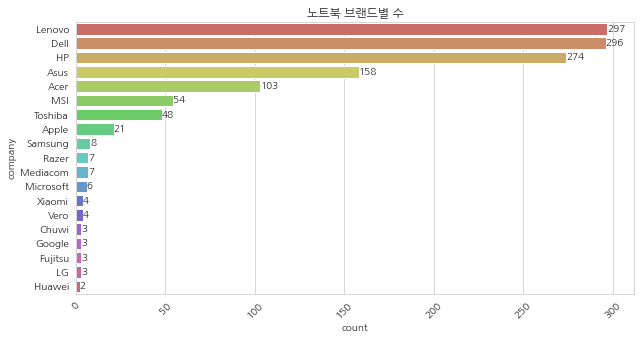

In [148]:
# sample의 회사별 갯수
fig, axe = plt.subplots(figsize=(10,5))
axe = sns.countplot(data = df_data, y = 'company', palette = 'hls', order = df_data['company'].value_counts().index)
axe.set_xticklabels(axe.get_xticklabels(), rotation = 45)
axe.set_title('노트북 브랜드별 수')
axe.bar_label(axe.containers[0])

[Text(0, 0, '727'),
 Text(0, 0, '205'),
 Text(0, 0, '196'),
 Text(0, 0, '120'),
 Text(0, 0, '28'),
 Text(0, 0, '25')]

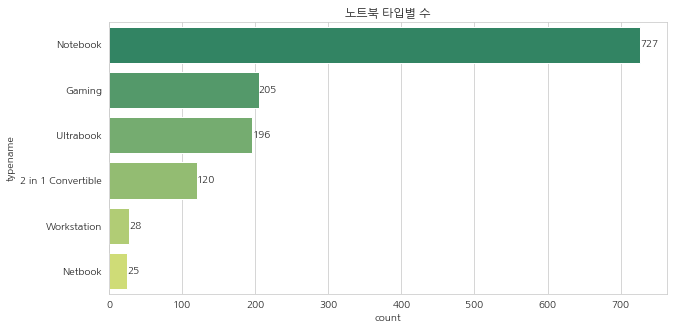

In [149]:
fig, axe = plt.subplots(figsize = (10, 5))
axe = sns.countplot(data = df_data, y = 'typename', palette = 'summer', order = df['typename'].value_counts().index)
axe.set_title('노트북 타입별 수')
axe.bar_label(axe.containers[0])

[Text(0, 0, '1071'),
 Text(0, 0, '66'),
 Text(0, 0, '62'),
 Text(0, 0, '45'),
 Text(0, 0, '26'),
 Text(0, 0, '13'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '2')]

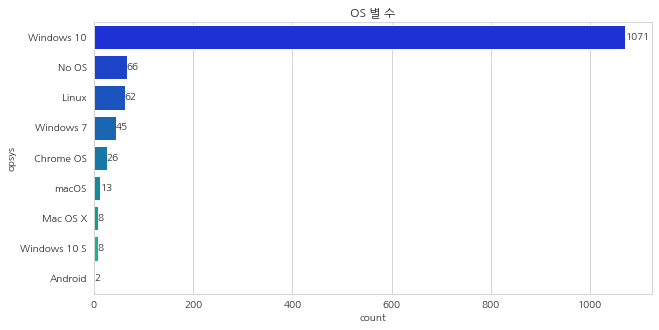

In [150]:
fig, axe = plt.subplots(figsize = (10, 5))
axe = sns.countplot(data = df_data, y = 'opsys', palette = 'winter', order = df['opsys'].value_counts().index)
axe.set_title('OS 별 수')
axe.bar_label(axe.containers[0])

[Text(0, 0, '664'),
 Text(0, 0, '197'),
 Text(0, 0, '164'),
 Text(0, 0, '164'),
 Text(0, 0, '39'),
 Text(0, 0, '33')]

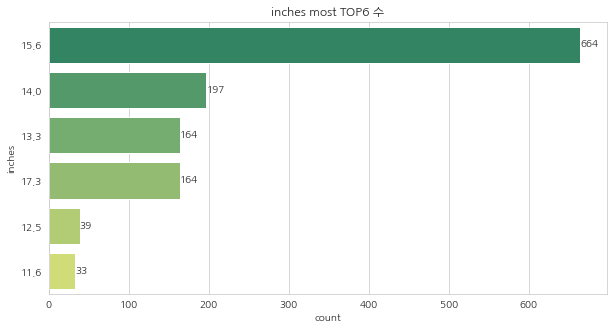

In [151]:
fig, axe = plt.subplots(figsize = (10, 5))
axe = sns.countplot(data = df_data, y = 'inches', palette = 'summer', order = df['inches'].value_counts().index[:6])
axe.set_title('inches most TOP6 수')
axe.bar_label(axe.containers[0])

## Outlier 확인

/tmp/ipykernel_3078/1219920765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axe = sns.distplot(df_data['price_euros'])


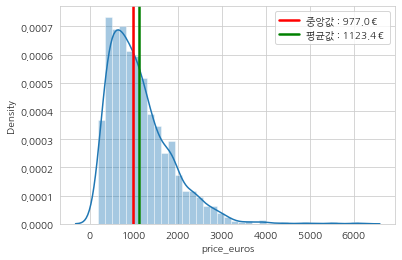

In [152]:
# 가격의 분포(euros 단위 * 1400 == 한국)
axe = sns.distplot(df_data['price_euros'])

axe.axvline(df_data['price_euros'].median(), color='r', linewidth=2.5, label='중앙값 : '+ str(round(df_data['price_euros'].median(),1)) + '€')
axe.axvline(df_data['price_euros'].mean(), color='g', linewidth=2.5, label='평균값 : '+ str(round(df_data['price_euros'].mean(),1)) + '€')

axe.legend(loc = 'upper right')

#### inches data는 모델을 만들 때 배제
- weight(Kg)
- cpu(GHz)
- memory(GB)
- ram(GB)

In [153]:
 df_data['weight(Kg)'] = pd.to_numeric(df_data['weight(Kg)'], errors='coerce')

/tmp/ipykernel_3078/810995735.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data['weight(Kg)'], ax = axes[1])


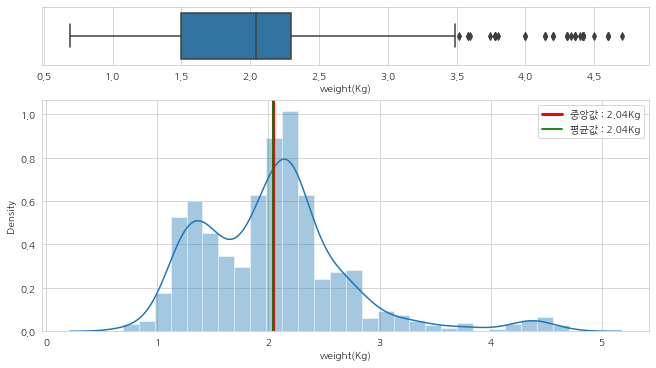

In [154]:
# weight(Kg)

fig, axes = plt.subplots(2,1, figsize = (9, 5), height_ratios=[.2, .8], layout = 'constrained')
sns.boxplot(data = df_data, x = 'weight(Kg)', ax = axes[0])
sns.distplot(df_data['weight(Kg)'], ax = axes[1])
axes[1].axvline(df_data['weight(Kg)'].median(), color = 'r', linewidth = 3, label = '중앙값 : ' + str(round(df_data['weight(Kg)'].median(), 2)) + 'Kg')
axes[1].axvline(df_data['weight(Kg)'].mean(), color = 'g', linewidth = 1.8, label = '평균값 : ' + str(round(df_data['weight(Kg)'].mean(), 2)) + 'Kg')
axes[1].legend(loc = 'upper right')

/tmp/ipykernel_3078/3298481229.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data['cpu(GHz)'], ax = axes[1])


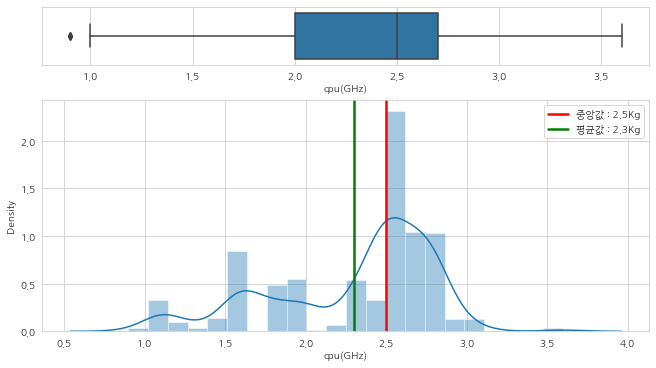

In [155]:
# cpu(GHz)
fig, axes = plt.subplots(2,1, figsize = (9, 5), height_ratios=[.2, .8], layout = 'constrained')
sns.boxplot(data = df_data, x = 'cpu(GHz)', ax = axes[0])
sns.distplot(df_data['cpu(GHz)'], ax = axes[1])
axes[1].axvline(df_data['cpu(GHz)'].median(), color = 'r', linewidth = 2.5, label = '중앙값 : ' + str(round(df_data['cpu(GHz)'].median(), 2)) + 'Kg')
axes[1].axvline(df_data['cpu(GHz)'].mean(), color = 'g', linewidth = 2.5, label = '평균값 : ' + str(round(df_data['cpu(GHz)'].mean(), 2)) + 'Kg')
axes[1].legend(loc = 'upper right')

In [189]:
print(df_data['cputype'].value_counts())

enc = LabelEncoder()

df_data['cputype1'] = enc.fit_transform(df_data['cputype'])

df_data['cputype1'] = df_data['cputype1'].astype(np.int64)

df_data['cputype1'].value_counts()

cputype
Intel    1239
AMD        62
Name: count, dtype: int64


cputype1
1    1239
0      62
Name: count, dtype: int64

In [181]:
print(df_data['gputype'].value_counts())

enc = LabelEncoder()
df_data['gputype1'] = enc.fit_transform(df_data['gputype'])

df_data['gputype1'] = df_data['gputype1'].astype(np.int64)

df_data['gputype1'].value_counts()

# intel - 1
# Nvidia - 2
# AMD - 0

gputype
Intel     722
Nvidia    399
AMD       180
Name: count, dtype: int64


gputype1
1    722
2    399
0    180
Name: count, dtype: int64

/tmp/ipykernel_3078/655422211.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data['memory(GB)'], ax = axes[1])


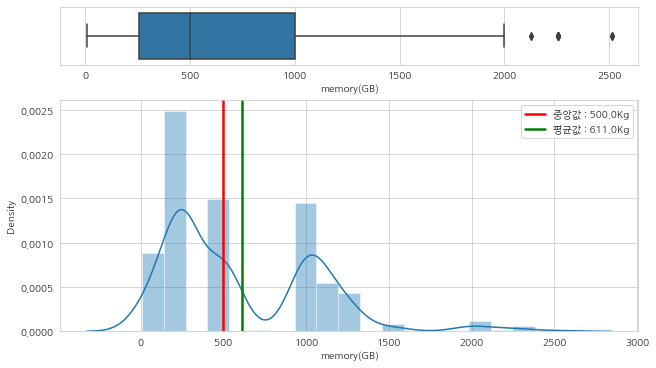

In [173]:
# memory(GB)
fig, axes = plt.subplots(2,1, figsize = (9, 5), height_ratios=[.2, .8], layout = 'constrained')
sns.boxplot(data = df_data, x = 'memory(GB)', ax = axes[0])
sns.distplot(df_data['memory(GB)'], ax = axes[1])
axes[1].axvline(df_data['memory(GB)'].median(), color = 'r', linewidth = 2.5, label = '중앙값 : ' + str(round(df_data['memory(GB)'].median(), 2)) + 'Kg')
axes[1].axvline(df_data['memory(GB)'].mean(), color = 'g', linewidth = 2.5, label = '평균값 : ' + str(round(df_data['memory(GB)'].mean(), 2)) + 'Kg')
axes[1].legend(loc = 'upper right')

/tmp/ipykernel_3078/3063180288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data['ram(GB)'], ax = axes[1])


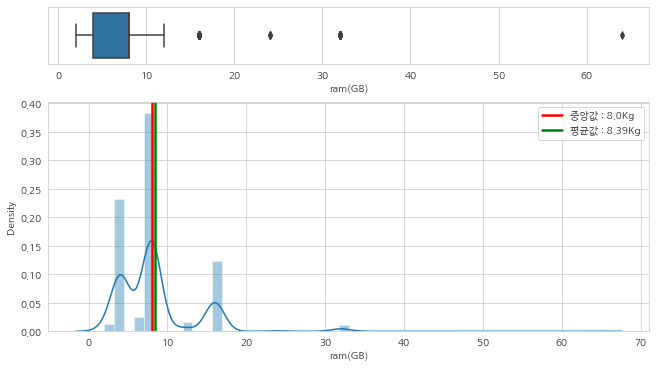

In [174]:
# ram(GB)
fig, axes = plt.subplots(2,1, figsize = (9, 5), height_ratios=[.2, .8], layout = 'constrained')
sns.boxplot(data = df_data, x = 'ram(GB)', ax = axes[0])
sns.distplot(df_data['ram(GB)'], ax = axes[1])
axes[1].axvline(df_data['ram(GB)'].median(), color = 'r', linewidth = 2.5, label = '중앙값 : ' + str(round(df_data['ram(GB)'].median(), 2)) + 'Kg')
axes[1].axvline(df_data['ram(GB)'].mean(), color = 'g', linewidth = 2.5, label = '평균값 : ' + str(round(df_data['ram(GB)'].mean(), 2)) + 'Kg')
axes[1].legend(loc = 'upper right')

/home/jjam/.local/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, '상관도 Heatmap')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


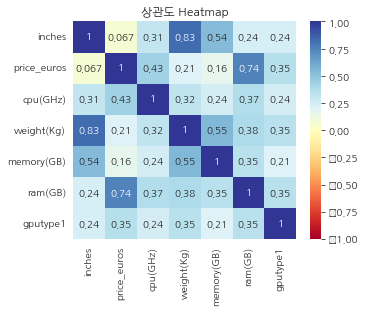

In [182]:
fig, axe = plt.subplots(figsize=(5,4))
axe = sns.heatmap(df_data[['inches', 'price_euros', 'cpu(GHz)', 'weight(Kg)', 'memory(GB)', 'ram(GB)', 'gputype1']].corr(), cmap='RdYlBu', annot=True, vmin=-1, vmax=1)
axe.set_title('상관도 Heatmap')

In [185]:
# linear_regression 생성
X = df_data[['cpu(GHz)', 'weight(Kg)', 'memory(GB)', 'ram(GB)', 'gputype1']]

y = df_data['price_euros']

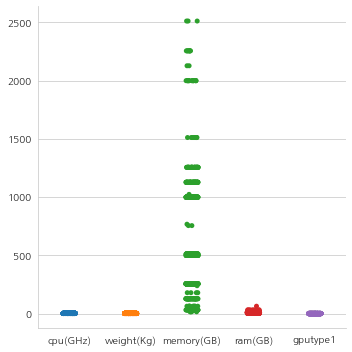

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 65) # 65


sns.catplot(X_train)

#mms = MinMaxScaler().fit(X_train)
#X_train = mms.transform(X_train)
#X_test = mms.transform(X_test)

#sns.catplot(X_train)

In [204]:
for m in [LinearRegression(), SGDRegressor(max_iter=1000), Ridge(alpha = 0.1), 
          Lasso(alpha = 0.1)]:
    m.fit(X_train, y_train)
    print(m.coef_) # 기울기
    print(m.intercept_) # y절편
    print('train score : ', m.score(X_train, y_train))
    print('test score : ', m.score(X_test, y_test))
    print('=================================================')
    print('')

# intel - 1
# Nvidia - 2
# AMD - 0
    
# ax + b = price
# (801.64633614*cpu(input) + -374.05380669*weight(input) + -414.16571055*memory(input) + 6028.96571944*ram)(input) + 322.08074266185736

[ 2.81666118e+02 -1.27179458e+02 -1.57196003e-01  9.37786716e+01
  1.26444726e+02]
-95.76690219110219
train score :  0.5827674423610694
test score :  0.6960336438502058

[ 1.60165869e+11  8.70196802e+09  1.28760014e+10 -1.56466467e+11
  1.83735682e+10]
[4.28315513e+10]
train score :  -1.740490410883378e+20
test score :  -1.5739728714833894e+20

[ 2.81527996e+02 -1.27098453e+02 -1.57224059e-01  9.37821927e+01
  1.26407855e+02]
-95.5833053164049
train score :  0.5827674308467354
test score :  0.69603729726223

[ 2.81177416e+02 -1.26644734e+02 -1.57426144e-01  9.37895407e+01
  1.26119401e+02]
-95.29705845217268
train score :  0.5827671622714165
test score :  0.6960480229879693



In [209]:
cpu, weight, memory, ram = list(map(float, input('').split()))
# cpu : 2 ~ 3.5
# weight :
# memory : 128, 256, 512, 1024
# ram : 4, 8, 16, 32
# intel - 1, Nvidia - 2, AMD - 0
price = (m.coef_[0]*cpu, m.coef_[1]*weight + m.coef_[2]*memory + m.coef_[3]*ram) + m.intercept_ 
# 3.2 2.32 512 16 인것 
print(price)
print('예상되는 GPU가 NVIDIA인 노트북 가격은 : ', round(price[1]*1400, 0), '원 정도입니다.')
print('예상되는 GPU가 인텔인 노트북 가격은 : ', round(price[0]*1400, 0), '원 정도입니다.')

3.4 1.57 512 16
[ 860.70615426 1125.90117484]
예상되는 GPU가 NVIDIA인 노트북 가격은 :  1576262.0 원 정도입니다.
예상되는 GPU가 인텔인 노트북 가격은 :  1204989.0 원 정도입니다.
